In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [4]:
claimants = pd.read_csv("claimants.csv")

In [5]:
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [6]:
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [7]:
claimants.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [8]:
claimants.drop(["CASENUM"],inplace=True,axis = 1)

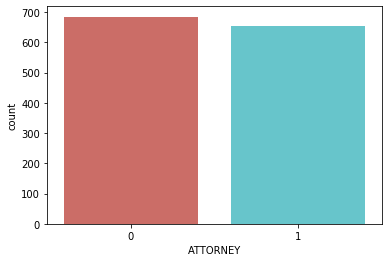

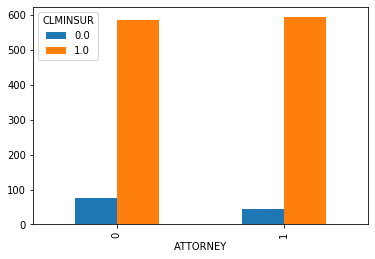

In [9]:
sb.countplot(x="ATTORNEY",data=claimants,palette="hls")
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind="bar")

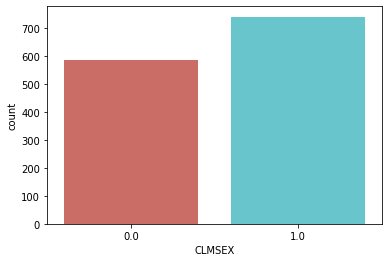

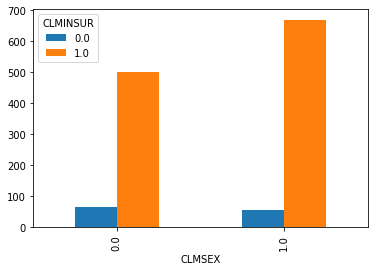

In [10]:
sb.countplot(x="CLMSEX",data=claimants,palette="hls")
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind="bar")

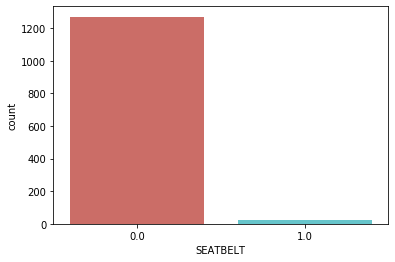

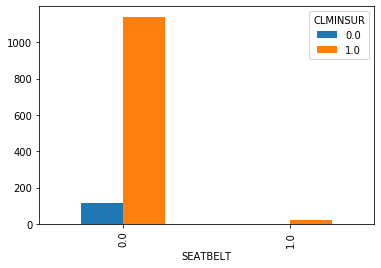

In [11]:
sb.countplot(x="SEATBELT",data=claimants,palette="hls")
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind="bar")

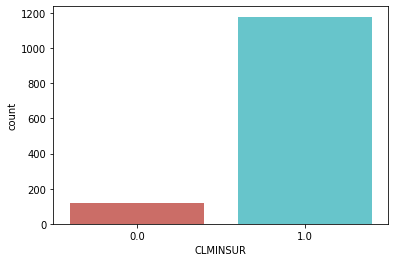

In [12]:
sb.countplot(x="CLMINSUR",data=claimants,palette="hls")

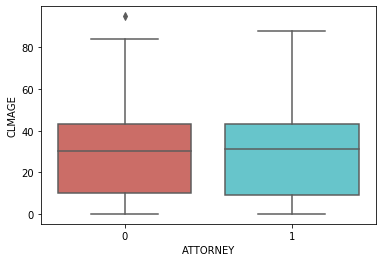

In [14]:
# Data Distribution - Boxplot of continuous variables wrt to each category of categorical columns

sb.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="hls")


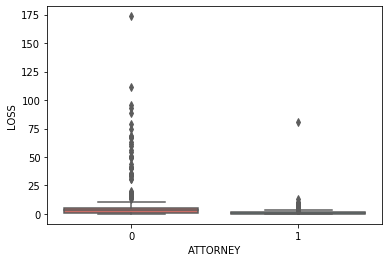

In [15]:
sb.boxplot(x="ATTORNEY",y="LOSS",data=claimants,palette="hls")

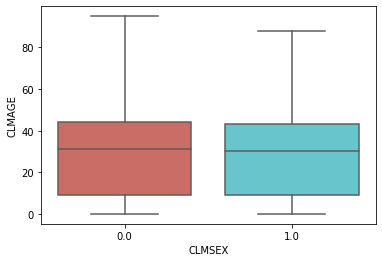

In [16]:
sb.boxplot(x="CLMSEX",y="CLMAGE",data=claimants,palette="hls")

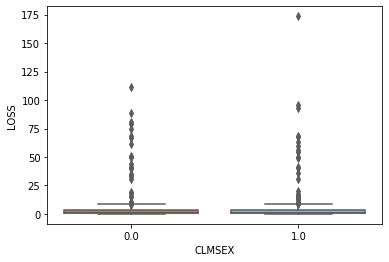

In [17]:
sb.boxplot(x="CLMSEX",y="LOSS",data=claimants,palette="hls")

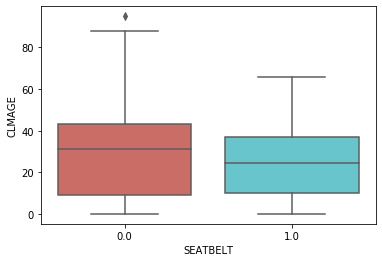

In [18]:
sb.boxplot(x="SEATBELT",y="CLMAGE",data=claimants,palette="hls")

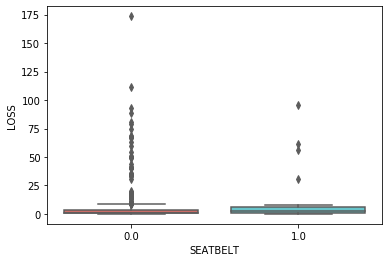

In [19]:
sb.boxplot(x="SEATBELT",y="LOSS",data=claimants,palette="hls")

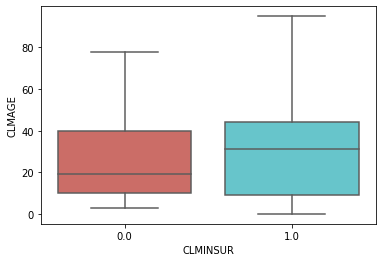

In [20]:
sb.boxplot(x="CLMINSUR",y="CLMAGE",data=claimants,palette="hls")

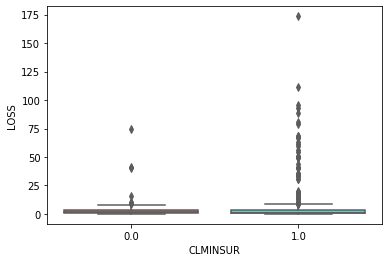

In [21]:

sb.boxplot(x="CLMINSUR",y="LOSS",data=claimants,palette="hls")

In [22]:
# To get the count of null values in the data 

claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [23]:
claimants.shape # 1340 6 => Before dropping null values

(1340, 6)

In [24]:
# To drop null values ( dropping rows)

claimants.dropna().shape # 1096 6 => After dropping null values

(1096, 6)

In [25]:
# Fill nan values with mode of the categorical column 

claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1

In [26]:
claimants["CLMINSUR"].fillna(1,inplace=True) # claimants.CLMINSUR.mode() = 1

claimants["SEATBELT"].fillna(0,inplace=True) # claimants.SEATBELT.mode() = 0

claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1

In [27]:
claimants.CLMAGE.fillna(28.4144,inplace=True) # claimants.CLMAGE.mean() = 28.4

In [28]:
# Model building 
from sklearn.linear_model import LogisticRegression

In [29]:
claimants.shape
X = claimants.iloc[:,[1,2,3,4,5]]
Y = claimants.iloc[:,0]
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
classifier.coef_ # coefficients of features 
classifier.predict_proba (X) # Probability values

array([[9.99974219e-01, 2.57808240e-05],
       [4.94202229e-01, 5.05797771e-01],
       [4.24737576e-01, 5.75262424e-01],
       ...,
       [2.85436331e-01, 7.14563669e-01],
       [6.85685530e-01, 3.14314470e-01],
       [3.38841622e-01, 6.61158378e-01]])

In [31]:
y_pred = classifier.predict(X)
claimants["y_pred"] = y_pred

In [32]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))

In [33]:
new_df = pd.concat([claimants,y_prob],axis=1)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)
type(y_pred)

[[435 250]
 [147 508]]


numpy.ndarray

In [36]:
accuracy = sum(Y==y_pred)/claimants.shape[0]
pd.crosstab(y_pred,Y)

ATTORNEY,0,1
row_0,,
0,435,147
1,250,508
